In [42]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import shutil
import tensorflow as tf
import PIL.Image as Image
from tensorflow import keras
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications import *
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn import model_selection
from tqdm import tqdm
from tensorflow.keras import optimizers

In [43]:
input_shape=(224,224,3)
conv_base = EfficientNetB0(weights="imagenet", include_top=False, input_shape=input_shape)

16719872/16705208 [==============================] - 2s 0us/step


In [44]:
labels=os.listdir(r'C:\Users\Aditi\Desktop\Projects\Brain Tumor detection\Training')
print(labels)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [45]:
all_files=[]
for item in labels:
    files=os.listdir('C:/Users/Aditi/Desktop/Projects/Brain Tumor detection/Training'+'/'+item)
    for i in files:
        all_files.append((item,str(item+'/'+i)))

In [46]:
all_files

[('glioma_tumor', 'glioma_tumor/gg (1).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (10).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (11).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (12).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (13).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (14).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (15).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (16).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (17).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (18).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (19).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (2).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (20).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (21).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (22).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (23).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (24).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (25).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (26).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (27).jpg'),
 ('glioma_tumor', 'glioma_tumor/gg (28).jpg'),
 ('glioma_tumor

In [47]:
data=pd.DataFrame(data=all_files,columns=['Labels','Image'])

In [48]:
data

,Labels,Image
0,glioma_tumor,glioma_tumor/gg (1).jpg
1,glioma_tumor,glioma_tumor/gg (10).jpg
2,glioma_tumor,glioma_tumor/gg (11).jpg
3,glioma_tumor,glioma_tumor/gg (12).jpg
4,glioma_tumor,glioma_tumor/gg (13).jpg
...,...,...
195,pituitary_tumor,pituitary_tumor/p (50).jpg
196,pituitary_tumor,pituitary_tumor/p (6).jpg
197,pituitary_tumor,pituitary_tumor/p (7).jpg
198,pituitary_tumor,pituitary_tumor/p (8).jpg


In [53]:
images=[]
label=[]
path='C:/Users/Aditi/Desktop/Projects/Brain Tumor detection/Training'
for i in range(0,len(all_files)):
    filepath=str(path+'/'+all_files[i][1])
    img=(cv2.imread(filepath))
    img=cv2.resize(img,(224,224))
    images.append(img)
    label.append(all_files[i][0])

In [54]:
images=np.array(images)

In [55]:
images.shape

(200, 224, 224, 3)

In [56]:
y=pd.get_dummies(data.Labels)
print(y)

     glioma_tumor  meningioma_tumor  no_tumor  pituitary_tumor
0               1                 0         0                0
1               1                 0         0                0
2               1                 0         0                0
3               1                 0         0                0
4               1                 0         0                0
..            ...               ...       ...              ...
195             0                 0         0                1
196             0                 0         0                1
197             0                 0         0                1
198             0                 0         0                1
199             0                 0         0                1

[200 rows x 4 columns]


# Training

In [57]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D(name="gap"))

In [58]:
model.add(layers.Dropout(0.2, name="dropout_out"))

In [59]:
# model.add(layers.Dense(4, activation="softmax", name="fc_out"))
# conv_base.trainable = False

model.add(layers.Dense(4, activation="softmax"))
conv_base.trainable = False

In [60]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(images,y,shuffle=True,random_state=42,test_size=0.4)

In [61]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 224, 224, 3)
(120, 4)
(80, 224, 224, 3)
(80, 4)


In [62]:
# model.compile(
#     loss="categorical_crossentropy",
#     optimizer=optimizers.RMSprop(lr=2e-5),
#     metrics=["acc"],
# )

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["acc"],
)

In [63]:
history = model.fit(x_train, y_train, epochs=5, verbose=2)

Epoch 1/5
4/4 - 11s - loss: 3.1070 - acc: 0.3167 - 11s/epoch - 3s/step
Epoch 2/5
4/4 - 4s - loss: 2.1304 - acc: 0.4167 - 4s/epoch - 970ms/step
Epoch 3/5
4/4 - 4s - loss: 1.6592 - acc: 0.4667 - 4s/epoch - 973ms/step
Epoch 4/5
4/4 - 4s - loss: 1.2117 - acc: 0.5833 - 4s/epoch - 989ms/step
Epoch 5/5
4/4 - 4s - loss: 0.8931 - acc: 0.7250 - 4s/epoch - 998ms/step


In [64]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

3/3 [==============================] - 4s 773ms/step - loss: 0.7951 - acc: 0.7750


In [65]:
print("Test Loss: ",test_loss)
print("Test Accuracy: ",round(test_acc*100,2),"%")

Test Loss:  0.7951260805130005
Test Accuracy:  77.5 %


# Validation

In [66]:
y_pred=model.predict(x_test)
score=model.evaluate(x_test, y_test,verbose=1)

3/3 [==============================] - 3s 766ms/step - loss: 0.7951 - acc: 0.7750


# Prediction

In [67]:
import easygui
import imageio

In [68]:
name=input("Input patient name  ")

Input patient name  Miss Singhania


In [82]:
print("Submit your image for diagnosis")
flag=0
while(flag==0):    
    ImagePath=easygui.fileopenbox()
    img=cv2.imread(ImagePath)
    if img is None:
            print("Can not find any image. Choose appropriate file")
            continue
    else:
        flag=1

Submit your image for diagnosis


In [83]:
img.shape

(512, 512, 3)

In [84]:
img=cv2.resize(img,(224,224))

In [85]:
img.shape

(224, 224, 3)

In [86]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [87]:
from PIL import Image as im

In [88]:
image=im.fromarray(img)

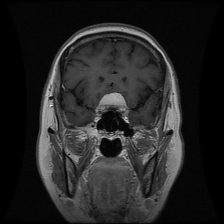

In [89]:
image

In [90]:
img=cv2.resize(img,(224,224))

In [91]:
img.shape

(224, 224, 3)

In [92]:
img=img[np.newaxis,...]

In [93]:
img.shape

(1, 224, 224, 3)

In [94]:
ans=model.predict(img)

In [95]:
ans

array([[0.02060004, 0.9630418 , 0.00610753, 0.01025072]], dtype=float32)

In [96]:
index=np.argmax(ans)

In [97]:
index

1

In [98]:
accuracy=round((np.amax(ans)*100),2)

In [99]:
if index==0:
    tumor="Glioma Tumor"
elif index==1:
    tumor="Meningioma Tumor"
elif index==2:
    tumor="No Tumor"
else:
    tumor="Pitutary Tumor"
print("There is a {percent}% chance that {name} suffers from {tumor}.".format(percent=accuracy,name=name,tumor=tumor))

There is a 96.3% chance that Miss Singhania suffers from Meningioma Tumor.
